In [36]:
import keras
import os
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from skimage.io import imread,imsave
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
images=[]
labels=[]
for folders in os.listdir('./classified_dataset'):
    for files in os.listdir('./classified_dataset/'+folders):
        img=cv2.imread('./classified_dataset/'+folders+'/'+files,0)/255
        img=cv2.resize(img,(128,128))
        img.shape=(128,128,1)
        images.append(img)
        labels.append(folders)
images=np.array(images)
labels=np.array(labels)      

In [3]:
# no of images 
images.shape

(2999, 128, 128, 1)

In [4]:
#no of letters used
np.unique(labels)

array(['0', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9'],
      dtype='<U2')

In [20]:
model = Sequential()
model.add(Conv2D(64, (5, 5), input_shape=(128,128,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(11, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 124, 124, 64)      1664      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 58, 58, 32)        51232     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 25, 25, 32)        25632     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 32)        0         
__________

In [21]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=[keras.metrics.categorical_accuracy])

In [22]:
y_labels=to_categorical(labels)

In [23]:
y_labels.shape

(2999, 11)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(images, y_labels, test_size=0.33, random_state=42)
keras.initializers.lecun_uniform(seed=None)

In [25]:
X_test.shape

(990, 128, 128, 1)

In [26]:
X_train.shape

(2009, 128, 128, 1)

In [27]:
y_train.shape

(2009, 11)

In [28]:
y_test.shape

(990, 11)

In [29]:
history = model.fit(X_train,y_train,validation_split=0.1,verbose=1,epochs=15)

Train on 1808 samples, validate on 201 samples
Epoch 1/15
1808/1808 [==============================] - 22s 12ms/step - loss: 2.4234 - categorical_accuracy: 0.0951 - val_loss: 2.3978 - val_categorical_accuracy: 0.0846
Epoch 2/15
1808/1808 [==============================] - 21s 12ms/step - loss: 2.3421 - categorical_accuracy: 0.1455 - val_loss: 1.8898 - val_categorical_accuracy: 0.3483
Epoch 3/15
1808/1808 [==============================] - 21s 11ms/step - loss: 1.4035 - categorical_accuracy: 0.5642 - val_loss: 0.7761 - val_categorical_accuracy: 0.7811
Epoch 4/15
1808/1808 [==============================] - 22s 12ms/step - loss: 0.6757 - categorical_accuracy: 0.7666 - val_loss: 0.3988 - val_categorical_accuracy: 0.8955
Epoch 5/15
1808/1808 [==============================] - 22s 12ms/step - loss: 0.4516 - categorical_accuracy: 0.8451 - val_loss: 0.2351 - val_categorical_accuracy: 0.9254
Epoch 6/15
1808/1808 [==============================] - 21s 11ms/step - loss: 0.2988 - categorical_accu

In [30]:
model.save_weights("my_model_weights.h5")

In [31]:
history.history

{'val_loss': [2.397849136324071,
  1.8898208864885777,
  0.7760763862239781,
  0.39883496571536087,
  0.23514424427528285,
  0.2552739063750452,
  0.16467082593126678,
  0.17442912278483755,
  0.2122970114818853,
  0.10773050216077572,
  0.334918917708136,
  0.121390446056774,
  0.1379307672307266,
  0.18599267875710826,
  0.2463935592712195],
 'val_categorical_accuracy': [0.08457711446492826,
  0.34825870691247246,
  0.7810945282528057,
  0.8955223886527826,
  0.9253731343283582,
  0.9203980099502488,
  0.9552238805970149,
  0.9353233830845771,
  0.9203980099502488,
  0.9651741293532339,
  0.905472637112461,
  0.9552238805970149,
  0.9601990049751243,
  0.945273631840796,
  0.945273631840796],
 'loss': [2.4234171082488203,
  2.3420720902164427,
  1.403481393788768,
  0.6756543538211721,
  0.45164513231906217,
  0.2987867845139936,
  0.2576957903143051,
  0.20605390987037558,
  0.16238643255381457,
  0.13159439053419417,
  0.11105151131617284,
  0.13833998511256898,
  0.097938420024362

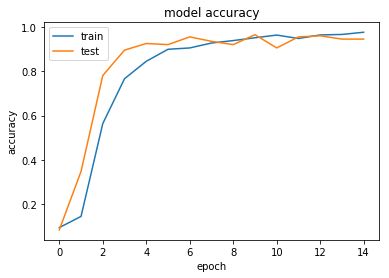

In [32]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

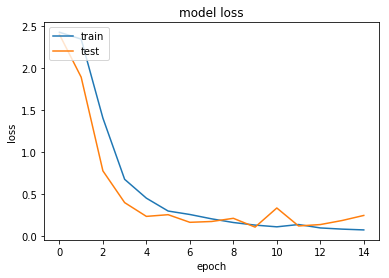

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [49]:
y_pred  = model.predict_classes(X_test)

In [50]:
y_pred.shape

(990,)

In [52]:
test_set = np.where(y_test==1)[1]
test_set.shape

(990,)

In [56]:
metrics.accuracy_score(test_set,y_pred)

0.908080808080808

In [59]:
metrics.confusion_matrix(test_set,y_pred)

array([[92,  6,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3, 85,  0,  0,  0,  0,  1,  2,  0,  0,  0],
       [ 3,  0, 85,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 78,  0,  1,  3,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 78,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  2,  1,  0, 88,  0,  0,  1,  2,  0],
       [ 1,  0,  0,  0,  0,  0, 77, 12,  1,  1,  1],
       [ 0,  0,  0,  0,  0,  0,  3, 84,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 92,  0,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  3,  0, 80, 11],
       [ 0,  0,  2,  0,  0,  0,  1,  0,  0, 23, 60]])

In [61]:
metrics.precision_recall_fscore_support(test_set,y_pred)

(array([0.92929293, 0.93406593, 0.93406593, 0.98734177, 1.        ,
        0.98876404, 0.90588235, 0.81553398, 0.9787234 , 0.74766355,
        0.81081081]),
 array([0.92      , 0.93406593, 0.96590909, 0.95121951, 0.975     ,
        0.93617021, 0.82795699, 0.95454545, 0.9787234 , 0.85106383,
        0.69767442]),
 array([0.92462312, 0.93406593, 0.94972067, 0.9689441 , 0.98734177,
        0.96174863, 0.86516854, 0.87958115, 0.9787234 , 0.7960199 ,
        0.75      ]),
 array([100,  91,  88,  82,  80,  94,  93,  88,  94,  94,  86]))